# Implementation of Deep-Walk Tutorial


In this tutorial we are going to learn about the implementation of Deep-Walk Algorithm from screatch.

Following are the Requirements for this Implementation.

1. Python 3.0 +
2. Pytorch
3. Karateclub
4. DGL (Deep Graph Library)
5. gensim (word2vec)

# Implementation is going to Happen in following phases.

1. Implementation from scratch

2. Library Implementation

3. Examples of Deep-Walk on Datasets

# Phase-1

From Scratch Implementation using Python:

In [11]:
# Importing nessesary Libraries 

import networkx as nx # to visulaize and load graph data
import random
import numpy as np
from typing import List
from tqdm import tqdm
from gensim.models.word2vec import Word2Vec # for implimenting Skip-Gram Model

import matplotlib.pyplot as plt

from IPython.display import display
from PIL import Image

# Let's first look at the Psudo-code of the DeepWalk 

### Reference: 
Bryan Perozzi, Rami Al-Rfou, and Steven Skiena. 2014. DeepWalk: online learning of social representations. In Proceedings of the 20th ACM SIGKDD international conference on Knowledge discovery and data mining (KDD '14). Association for Computing Machinery, New York, NY, USA, 701–710. https://doi.org/10.1145/2623330.2623732


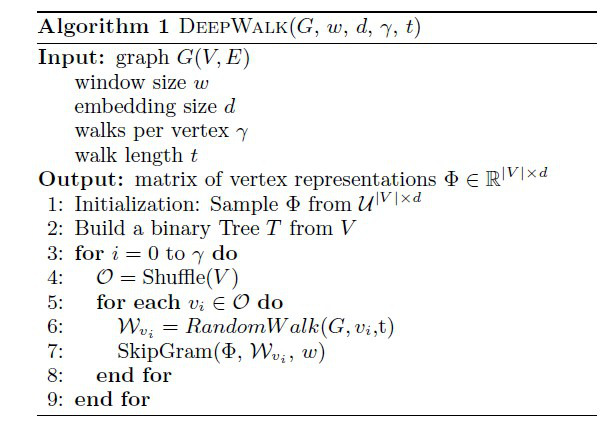

In [15]:
display(Image.open('C:/Users/ANIMESH/Desktop/ANI PC/PhD Prepratery Work/Graph ML/Graph-Machine-Learning-IITKGP/Images/Deep-Walk-1.jpg'))

## DeepWalk consist of mainly 2 parts
1. Doing random Walks
2. Genrating embeddings using skip-gram on those random walks

### Function for generating Random Walks:

Ceating a function ```random_walk()``` which will take the starting node and the walk length as the input and return one random walk.

In [39]:
def random_walk(G,start_node, walk_length):
        # Simulate a random walk starting from start node.
        walk = [start_node] # initiating
        while len(walk) < walk_length:
            cn = walk[-1] #cn: current node
            cn_nbrs = list(G.neighbors(cn)) # cn_nbrs: neighbors of current node
            if len(cn_nbrs) == 0:
                break
            k = int(np.floor(np.random.rand()*len(cn_nbrs))) # you can decide which number to choose based on length of current neighbors
            # we can do this steps by following way as well
            # p = random.choice(cn_nbrs)
            walk.append(cn_nbrs[k])
            #walks.append(p)
        return walk

Ceating a function ```walks()``` which will take the argument as walk_per_node and return random walks for every node.

In [44]:
def walks(G, walks_per_node,walk_length):
        # Repeatedly simulate random walks from each node.
        walks = []
        nodes = list(G.nodes())
        print('node number:', len(nodes))
        for walk_iter in range(walks_per_node):
            #print(str(walk_iter + 1), '/', str(walks_per_node))
            random.shuffle(nodes)
            for node in nodes:
                walks.append(list(map(str,random_walk(G,node, walk_length)))) # to convert list of nodes into list[list[string]]
        return walks

Now we can check using a simple example of ```Karate_club_graph``` 

Source: https://networkx.org/documentation/stable/auto_examples/graph/plot_karate_club.html

Now we will use ```networkx``` library to load the graph and let see how our functions are working and generating the random walks as per given parameters by us.

1. import networkx
2. draw the graph to visualize

In [28]:
import networkx as nx
import matplotlib.pyplot as plt

In [23]:
# importing the karate club graph
G = nx.karate_club_graph()

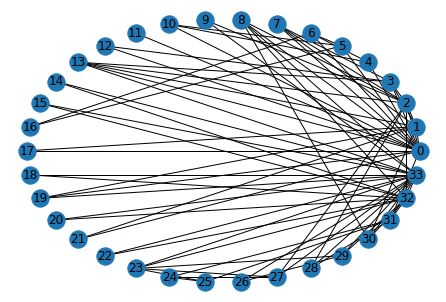

In [29]:
# visualizing the graph
nx.draw_circular(G, with_labels=True)
plt.show()

### Now let's generate the random walks using the functions which we created

In [45]:
# to store all the walks in "all_walks" variable 
# considering 
# walks_per_node = 5
# walk_length = 10

all_walks = walks(G,5,10)

node number: 34


Now, because we have generated 5 walks per node and there are 34 nodes in this graph, so there should be 170 number of walks

In [46]:
print('total number of walks = ',len(all_walks))  # to check the total number of walks

print(' ')

all_walks # just to check how all the walks looks like

total number of walks =  170
 


[['27', '2', '8', '2', '1', '13', '1', '2', '9', '2'],
 ['21', '0', '19', '33', '9', '2', '32', '30', '33', '18'],
 ['23', '29', '33', '30', '32', '22', '33', '18', '32', '22'],
 ['26', '29', '32', '18', '33', '27', '2', '28', '2', '0'],
 ['8', '32', '30', '32', '8', '2', '1', '21', '1', '19'],
 ['19', '33', '32', '18', '33', '29', '32', '18', '33', '14'],
 ['31', '25', '31', '0', '31', '25', '23', '33', '31', '28'],
 ['7', '2', '8', '33', '13', '2', '7', '0', '21', '0'],
 ['3', '12', '0', '3', '7', '2', '8', '2', '27', '33'],
 ['20', '32', '15', '33', '22', '33', '14', '33', '15', '32'],
 ['10', '5', '10', '4', '0', '8', '32', '23', '27', '2'],
 ['11', '0', '8', '32', '18', '33', '19', '1', '17', '1'],
 ['1', '17', '1', '2', '8', '32', '29', '32', '22', '32'],
 ['2', '9', '2', '0', '10', '5', '10', '0', '8', '32'],
 ['15', '32', '22', '32', '15', '32', '20', '33', '26', '29'],
 ['18', '32', '33', '15', '32', '15', '32', '31', '32', '23'],
 ['0', '6', '5', '0', '8', '0', '11', '0', '21

### As we have generated the random walks from our graph, we have to implement skip-gram model to generate the embeddings.
- To generate the embedding using skip-gram method we are going to use ```word2vec``` model, which is basically skip-gram based embeddings generator method.

Following are the requirements for that:
1. import word2vec from gensim
source : https://radimrehurek.com/gensim/models/word2vec.html#module-gensim.models.word2vec


In [47]:
# creating the final function DeepWalk which will take all the walks vector as argument and return the embedding

def DeepWalk(generated_walks,window_size,embedding_vector_size):
    """
    Compute the node embeddings for the generated walks
    :param walks: List of walks
    :window_size: definr window size of list of nodes 
    :embedding_vector_size: what embedding vector size you want 
    :return:
    """
    model = Word2Vec(sentences=generated_walks, window=window_size, vector_size=embedding_vector_size)
    return model.wv

Now, let's check how our embeddings are looking like

In [49]:
# generate embeddings

dw = DeepWalk(all_walks,20,20)

In [52]:
len(dw)

34

## We can check generated embeddings stored in vector form: 

In [54]:
dw.vectors

array([[-2.15680264e-02, -1.84150580e-02,  5.63863665e-02,
         3.58926803e-02, -4.27717753e-02, -4.16227542e-02,
         7.31599256e-02,  1.17384367e-01, -7.72375464e-02,
        -1.27857951e-02,  7.53600448e-02, -1.47007760e-02,
        -2.38060169e-02,  1.45176789e-02, -4.83273587e-04,
        -1.36024328e-02,  9.21219885e-02, -3.16341547e-03,
        -8.20277929e-02, -9.30444524e-02],
       [ 1.46958092e-02,  4.32223547e-03,  7.26799741e-02,
        -6.35478040e-03,  3.62946428e-02, -2.13465653e-02,
         4.22722511e-02,  1.11342594e-01, -9.85076427e-02,
        -1.19379396e-02,  5.61709655e-03, -1.38065638e-02,
         4.54469323e-02, -5.72443604e-02,  1.95694044e-02,
        -1.45534948e-02,  1.28032461e-01, -4.00239751e-02,
        -4.69889604e-02, -7.53144771e-02],
       [-6.31965771e-02,  1.00176902e-02, -1.99757703e-02,
        -2.90240198e-02,  2.76451837e-03, -6.17207214e-03,
        -6.03175303e-03,  1.05427392e-01, -1.58045758e-02,
         5.15162498e-02, -1.0

Let's plot the embeddings and do some some analysis

In [60]:
print('Number of karate club members:', len(G.nodes))
print('Embedding array shape:', dw.vectors.shape)

Number of karate club members: 34
Embedding array shape: (34, 20)


Using DeepGraph we have generated the embedding vectors of size 20 for each node in Karate-club graph, and these embeddings should contain the information of that node etc.

### Explore similar embeddings:

we are generating similar embeddings from node 1

In [61]:
dw.similar_by_word('1')

[('13', 0.7507351040840149),
 ('24', 0.7341498136520386),
 ('28', 0.7189604043960571),
 ('16', 0.7061038613319397),
 ('33', 0.6501051187515259),
 ('0', 0.6091409921646118),
 ('2', 0.608796238899231),
 ('19', 0.5869402885437012),
 ('18', 0.546938419342041),
 ('5', 0.5377182960510254)]

# Phase-2

### Library Implementation of DeepWalk

In this we are going to use ```KarateClub``` library, which has already implemented the DeepWalk, we will now see how to use that.

Library gives you liberty to use function imported directly without writing any explicit code for implementation.

In [62]:
# We need to import some libraries 

from karateclub import DeepWalk

We are going to use same parameters as used befor:

number_of_walks = 5

walk_length = 10

window_size = 20,

embedding_dim = 20

In [63]:
model = DeepWalk(walk_length=10,walk_number=5,window_size=20,dimensions=20)
model.fit(G)
embeddings = model.get_embedding()


# ref: https://karateclub.readthedocs.io/en/latest/_modules/karateclub/node_embedding/neighbourhood/deepwalk.html#DeepWalk

In [64]:
embeddings

array([[ 8.98159575e-03, -1.35564227e-02, -4.23260443e-02,
         5.04527129e-02,  4.34542224e-02,  1.99028477e-02,
        -1.93224028e-02,  4.06230949e-02,  7.55444588e-03,
        -1.36229582e-02,  1.12849297e-02, -3.40574123e-02,
        -3.96568067e-02, -1.04516896e-03,  6.34348094e-02,
        -5.72241172e-02,  3.60428430e-02,  1.74105074e-02,
        -2.28318796e-02,  1.83184054e-02],
       [-3.16818692e-02,  3.25033069e-02,  1.65978912e-02,
        -1.23829376e-02, -4.30175364e-02,  5.30894659e-02,
        -8.68965313e-03,  4.70714718e-02,  1.89765114e-02,
         2.80020740e-02,  3.33471447e-02, -3.23110037e-02,
        -6.71399664e-03, -7.22384313e-03,  1.37247611e-02,
        -5.13511710e-02,  6.36874000e-04, -4.79245558e-02,
         2.75740959e-02,  1.90733727e-02],
       [ 4.28054817e-02,  3.70012932e-02, -2.15405170e-02,
         5.61526716e-02, -4.63028252e-03, -1.72576066e-02,
         3.25540900e-02,  1.23732584e-03, -3.66168022e-02,
        -8.17837939e-03,  4.7

In [65]:
print('Number of karate club members:', len(G.nodes))
print('Embedding array shape generated from karateclub:', embeddings.shape)

Number of karate club members: 34
Embedding array shape generated from karateclub: (34, 20)
